#  **Project: Capstone Project 1 – (Apply Inferential Statistics section 8.4)**

**Project name: -** Explanatory Analysis of Traffic pullover pattern for Florida v/s Vermont

**Student Name: -** Jitendra Agarwal 

**Course: -** Springboard cohort Jan2 2018
  
**Data set Source: -** https://openpolicing.stanford.edu/data/ 

**Data provider: -** Openpolicing project by Stanford


## **About the DATA**
The Raw data for this project contains the traffic stop data collected for 30+ states for open police project by Stanford research team. Standardized stop data are available to download (by state) from the link above provided by Stanford.
The csv includes a subset of common fields for each state and indicates whether data are available for at least 70% of records in that state. Some states have more fields.
The original, unprocessed data we collected contain even more information.
The Stanford Open Policing Project data are made available under the Open Data Commons Attribution License.

Downloaded excel sheet of raw data for VT: -
https://github.com/jiagarwa/capstone-project1-Jitendra

file name: - ‘VT-clean.csv.gz’

### **Accessing and filtering the Data**

1 . **Read data **

    Read Data from csv file VT-clean.csv and Filter based on Year as a parameter.

In [23]:
#Import Pandas and read csv into a DataFrame

import pandas as pd

def filter_csv_to_df(filename, year, chunk):
    
    df_new=pd.DataFrame()

    if chunk <= 10000 or chunk >= 100000000:
        chunk = 10 ** 8

    if year == '' :
        year = 2015
        
    for data in pd.read_csv(filename, chunksize=chunk, low_memory=False):
        df = pd.DataFrame(data)
        df_new = pd.concat([df_new, df], axis=0)
        
        if year == 0:
            filter_df = df_new
        else:
            filter_df = df_new.loc[pd.to_datetime(df_new['stop_date']).dt.year == year]
            
    return filter_df


 Filter data for Year 2015: -

 Import required finction and classes and Convert data into a data frame and filter based on year from stop_date column and save in a separate file Filter data by year 2015. Call it VT_2015.csv

In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()

#Filter 2014 and 2015 Traffic data based on year in the stop_date column

df_VT_2014 = filter_csv_to_df('../data/VT-clean.csv', 2014, 100000000)
df_VT_2015 = filter_csv_to_df('../data/VT-clean.csv', 2015, 100000000)

#df_FL_2015 = filter_csv_to_df('../data/FL-clean.csv', 2015, 100000000)

**Some Facts:- **


In [25]:
print ('Number of Total Traffic Stops Analyzed:', len(df_VT_2015.id))
print ('Number of Traffic Stops for Minority Race:', len(df_VT_2015[df_VT_2015.driver_race!='White'].id))
print ('Number of callbacks for Majority Race:', len(df_VT_2015[df_VT_2015.driver_race=='White'].id))
print ('Number of Registered drivers with Age 16 and older as of end of 2013 in vermont : 543057')

Number of Total Traffic Stops Analyzed: 45662
Number of Traffic Stops for Minority Race: 3213
Number of callbacks for Majority Race: 42449
Number of Registered drivers with Age 16 and older as of end of 2013 in vermont : 543057


2 . **Create Histogram to see the frequency of occurrences in continuous data set of Driver age.**

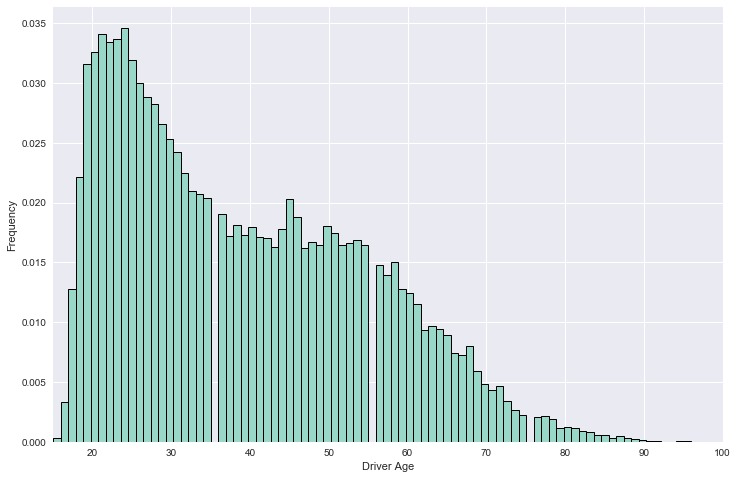

In [26]:
# Add couple of new calculcated column to the original Data Frame

df_VT_2015.is_copy = False
df_VT_2015['hour'] = pd.to_datetime(df_VT_2015['stop_time']).dt.hour
df_VT_2015['dayofweek'] = pd.to_datetime(df_VT_2015['stop_date']).dt.weekday_name
df_VT_2015.set_index(['hour', 'dayofweek'], append=True)

# Create a histogram of the Age as Driver age is the most discreate and Quantitaive column here.

plt.figure(figsize=(12,8))
df_VT_2015['driver_age'].plot('hist', label = '', legend=False, normed=True, color='#99d8c9', edgecolor='black', linewidth=1, bins=85)
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
plt.xlim(15,100);
plt.show()


3 . **Create Scatterplot and vialon plot to see the Distribution of Traffic stop by age across Race, Gender.**

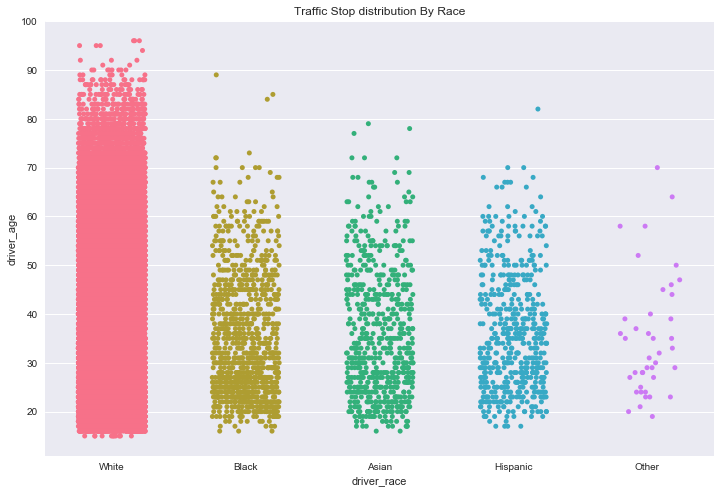

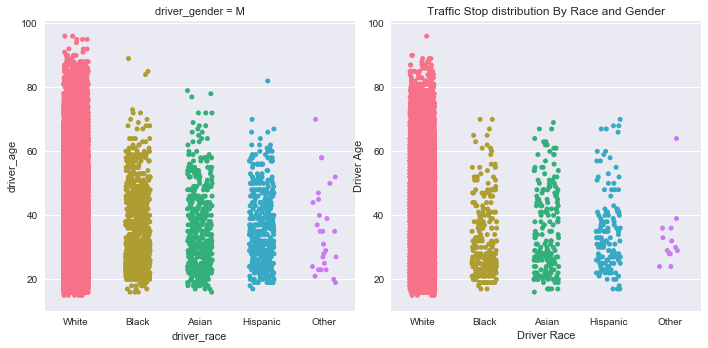

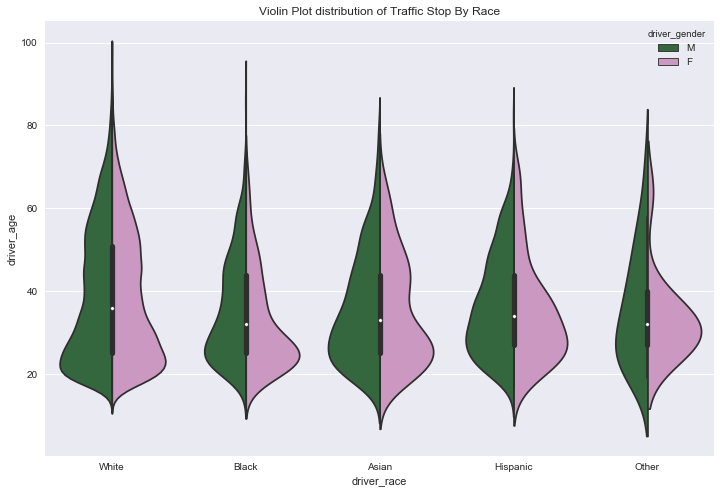

In [27]:
# Create Split plot of Race V/s the Age to see the distribution visually.

plt.figure(figsize=(12,8))
_ = plt.xlabel('Driver Race')
_ = plt.ylabel('Driver Age')
_ = plt.title('Traffic Stop distribution By Race')
sns.stripplot(x="driver_race", y="driver_age", data=df_VT_2015, jitter=.25, palette="husl");
plt.show()

# Create Splitted Split plot of Race V/s the Age split by gender.

_ = plt.figure(figsize=(12,8))
sns.factorplot(x="driver_race", y="driver_age", col="driver_gender", data=df_VT_2015, kind="strip", jitter=.2, size=5, palette="husl");
_ = plt.xlabel('Driver Race')
_ = plt.ylabel('Driver Age')
_ = plt.title('Traffic Stop distribution By Race and Gender')
plt.show()

# Create a Violin plot of gender V/s the Age split by Race.

plt.figure(figsize=(12,8))
_ = plt.xlabel('Driver Race')
_ = plt.ylabel('Driver Age')
_ = plt.title('Violin Plot distribution of Traffic Stop By Race')
sns.violinplot(x="driver_race", y="driver_age", hue="driver_gender", data=df_VT_2015, split=True, palette="cubehelix");
plt.show()


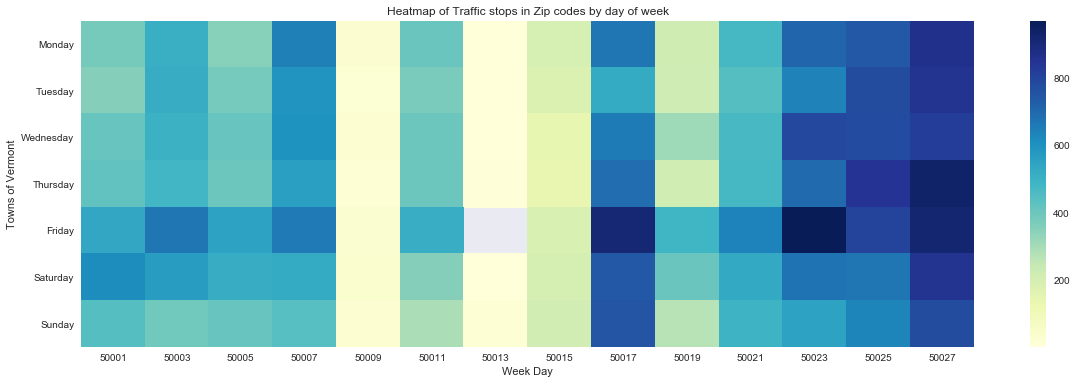

In [97]:
# create a seaborn Heatmap of Traffic stops in Zip codes by day of week

df_VT_2015_heat = df_VT_2015.dropna(subset = ['county_fips'])
df_VT_2015_heat['county_fips'] = df_VT_2015_heat['county_fips'].astype(int)

plt.figure(figsize=(20,6))
heat_data = pd.pivot_table(df_VT_2015_heat, values='id', index=['day'], columns=['county_fips'], aggfunc=np.count_nonzero)
heat_data.head()

ax = sns.heatmap(heat_data, cmap="YlGnBu", yticklabels=(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))
ax = plt.xlabel('Week Day')
ax = plt.ylabel('Towns of Vermont')
ax = plt.title('Heatmap of Traffic stops in Zip codes by day of week')

4 . ** Classification Model :- Logistic regression or Liner Regression **

We can see that most of the attributes/variable of data set are Categorical however age and time is a continues and Quantitative attribute.

We will first try to do a linear regression and then see if Logistic regression model is more suitable.
Logistic regression for binary classification is also supported with

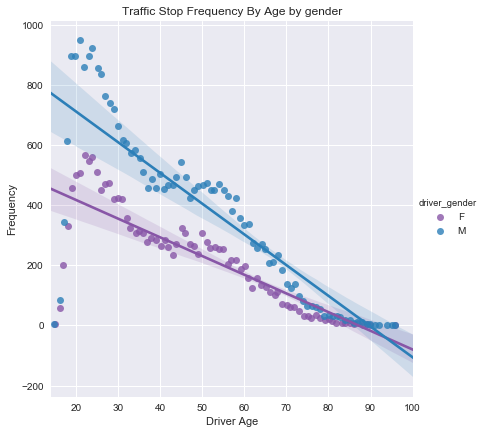

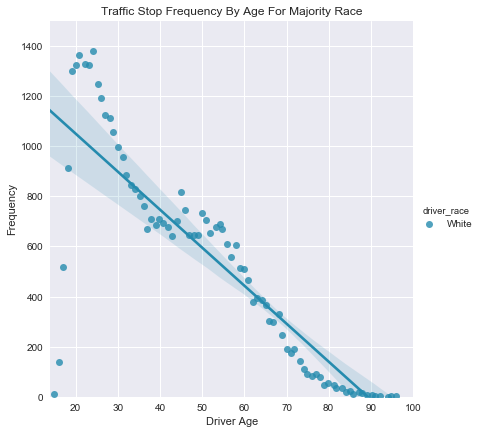

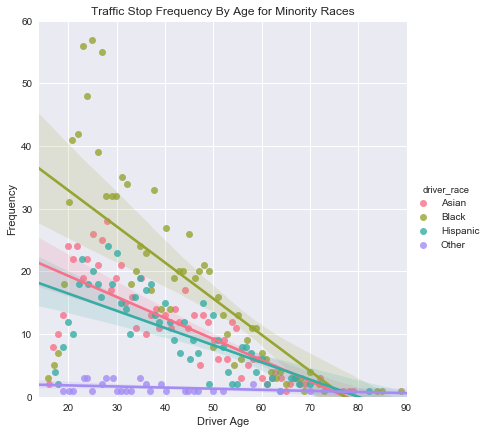

In [28]:
# Create a new DataFram after group by age and gender, Then we will compare this against the Race.

newdf2 = df_VT_2015.groupby(['driver_age','driver_gender']).id.count().reset_index()

# Create a Seaborn lmplot of Traffic Stop Frequency V/s the Age split by Gender.

sns.lmplot(x="driver_age", y="id", data=newdf2, hue='driver_gender', x_jitter=.2, size=6, palette=dict(M="#2c7fb8", F="#8856a7"));
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
_ = plt.title('Traffic Stop Frequency By Age by gender')
_ = plt.xlim(14,100)
plt.show()

# Create a new DataFram after group by age and Race.

newdf3 = df_VT_2015.groupby(['driver_age','driver_race']).id.count().reset_index()

# Create a Seaborn lmplot of Traffic Stop Frequency V/s the race. First with majority race and then with Minority

sns.lmplot(x="driver_age", y="id", data=newdf3[newdf3.driver_race == 'White'], hue='driver_race', x_jitter=.2, size=6, palette='PuBuGn_d');
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
_ = plt.title('Traffic Stop Frequency By Age For Majority Race')
_ = plt.xlim(14,100)
_ = plt.ylim(0,1500)
plt.show()


sns.lmplot(x="driver_age", y="id", data=newdf3[newdf3.driver_race != 'White'], hue='driver_race', x_jitter=.2, size=6, palette='husl');
_ = plt.xlabel('Driver Age')
_ = plt.ylabel('Frequency')
_ = plt.title('Traffic Stop Frequency By Age for Minority Races')
_ = plt.xlim(14,90)
_ = plt.ylim(0,60)
plt.show()


We can see that most Frequent Traffic stop involves the Male Driver of Majority Race and are under 25.
Lets test this further by creating user profiles and See visually who are stopped frequently .


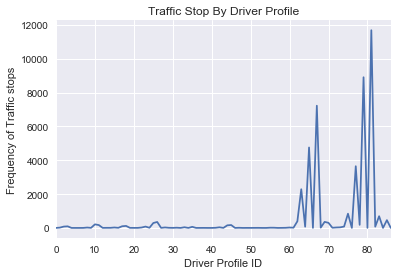

In [29]:
#Create a Dataframe of aggregated value by Driver Profile (Race, gender, Type of stop, Outcome and if arrested)

df_VT_2015_groups = df_VT_2015.groupby(['driver_race', 'driver_gender', 'violation', 'stop_outcome', 'is_arrested'], as_index=False).id.count().reset_index()
new_index= ['driver_race', 'driver_gender', 'violation', 'stop_outcome', 'is_arrested']
df_VT_2015_groups.reindex(new_index)


df_VT_2015_groups.sort_values(['driver_race', 'driver_gender', 'violation', 'stop_outcome', 'is_arrested'])
_ = plt.xlabel('Driver Profile ID')
_ = plt.ylabel('Frequency of Traffic stops')
_ = plt.title('Traffic Stop By Driver Profile')
df_VT_2015_groups.id.plot(kind='line')


We can see that there are close to 10 user profiles wiht most Frequesnt Traffic stop showed by those spikes.
Lets see what are top 15 profile who are stopped frequently.

In [30]:
#Get top 15 profile of Driver for Traffic stops.

VT_top_profile = pd.DataFrame(df_VT_2015_groups.nlargest(15, 'id'))

print('Most common Traffic stop were made for User Profile as:')
print(VT_top_profile.loc[81])

print ('Highest % of Total Traffic Stops for this Top User Profile is at:',
       np.around(VT_top_profile.loc[81]['id']/len(df_VT_2015.id)*100, decimals=2), '%')


Most common Traffic stop were made for User Profile as:
index                          81
driver_race                 White
driver_gender                   M
violation        Moving violation
stop_outcome      Written Warning
is_arrested                 False
id                          11692
Name: 81, dtype: object
Highest % of Total Traffic Stops for this Top User Profile is at: 25.61 %


** Mean and Median **

we are going to do a comparison between the two proportions of sample by race (White and Non White).
we shall also do a comparison between the multiple range of division by age.


According to the description for the collected data, every Traffic stop is different from other, therefore we may consider the samples are independent.

The sample size of each group (divided based on race) is above 30, hence we are safe to consider that CLT holds.


In [31]:
# Create two seperate Dataframe divided by race

data_racew = df_VT_2015[df_VT_2015.driver_race == 'White']
data_raceo = df_VT_2015[df_VT_2015.driver_race != 'White']

# Seperate Dataframe divided by race and calculate percent, median and % of tickets

n_total = len(df_VT_2015)

p_w = np.count_nonzero(data_racew.id) / n_total
t_w = np.count_nonzero(data_racew[data_racew.stop_outcome == 'Citation'].id) / len(data_racew)
m_w = data_racew['driver_age'].median()

p_b = np.count_nonzero(data_raceo.id) / n_total
t_b = np.count_nonzero(data_raceo[data_raceo.stop_outcome == 'Citation'].id) / len(data_raceo)
m_b = data_raceo['driver_age'].median()


print(' - Traffic stop % share for Majority race :', np.around(p_w*100, decimals=2), '%' )
print(' - Traffic stop % share for Minority race :', np.around(p_b*100, decimals=2), '%' )

print(' - Traffic Tickets % for Majority race :', np.around(t_w*100, decimals=2), '%' )
print(' - Traffic Tickets % for Minority race :', np.around(t_b*100, decimals=2), '%' )

print(' - Median age for Traffic stop for Majority race :', m_w )
print(' - Median age for Traffic stop for Minority race :', m_b )


 - Traffic stop % share for Majority race : 92.96 %
 - Traffic stop % share for Minority race : 7.04 %
 - Traffic Tickets % for Majority race : 37.75 %
 - Traffic Tickets % for Minority race : 43.08 %
 - Median age for Traffic stop for Majority race : 36.0
 - Median age for Traffic stop for Minority race : 35.0


- It is interesting to see if there is a 5% more chance to get a ticket after a traffic stop if Driver belong to Minority race.


In [32]:
# Create seperate Dataframe divided by age range

data_25 = df_VT_2015[df_VT_2015.driver_age <= 25 ]
data_40 = df_VT_2015[df_VT_2015.driver_age > 25][df_VT_2015.driver_age <= 40]
data_60 = df_VT_2015[df_VT_2015.driver_age > 40][df_VT_2015.driver_age <= 60]
data_90 = df_VT_2015[df_VT_2015.driver_age > 60 ]

# Dataframe created by age and calculate percent, median and % of tickets

n_total = len(df_VT_2015)

p_25 = np.count_nonzero(data_25.id) / n_total
m_25 = data_25['driver_age'].median()
t_25 = np.count_nonzero(data_25[data_25.stop_outcome == 'Citation'].id) / len(data_25)

p_40 = np.count_nonzero(data_40.id) / n_total
m_40 = data_40['driver_age'].median()
t_40 = np.count_nonzero(data_40[data_40.stop_outcome == 'Citation'].id) / len(data_40)

p_60 = np.count_nonzero(data_60.id) / n_total
m_60 = data_60['driver_age'].median()
t_60 = np.count_nonzero(data_60[data_60.stop_outcome == 'Citation'].id) / len(data_60)

p_90 = np.count_nonzero(data_90.id) / n_total
m_90 = data_90['driver_age'].median()
t_90 = np.count_nonzero(data_90[data_90.stop_outcome == 'Citation'].id) / len(data_90)


print(' - Traffic stop % share for Driver under age 25 :-', np.around(p_25*100, decimals=2), '%' )
print(' - Traffic stop % share for Driver age from 25 to 40 :-', np.around(p_40*100, decimals=2), '%' )
print(' - Traffic stop % share for Driver age from 41 to 60 :-', np.around(p_60*100, decimals=2), '%' )
print(' - Traffic stop % share for Driver age above 60 :-', np.around(p_90*100, decimals=2), '%' )
print('---')
print(' - Traffic Tickets % for Driver under age 25 :-', np.around(t_25*100, decimals=2), '%' )
print(' - Traffic Tickets % for Driver age from 25 to 40 :-', np.around(t_40*100, decimals=2), '%' )
print(' - Traffic Tickets % for Driver age from 41 to 60 :-', np.around(t_60*100, decimals=2), '%' )
print(' - Traffic Tickets % for Driver age above 60 :-', np.around(t_90*100, decimals=2), '%' )
print('---')
print(' - Median age for Traffic stop for Driver under age 25 :-', m_25 )
print(' - Median age for Traffic stop for Driver age from 25 to 40 :-', m_40 )
print(' - Median age for Traffic stop for Driver age from 41 to 60 :-', m_60 )
print(' - Median age for Traffic stop for Driver age above 60 :-', m_90 )


 - Traffic stop % share for Driver under age 25 :- 25.47 %
 - Traffic stop % share for Driver age from 25 to 40 :- 31.76 %
 - Traffic stop % share for Driver age from 41 to 60 :- 30.84 %
 - Traffic stop % share for Driver age above 60 :- 10.75 %
---
 - Traffic Tickets % for Driver under age 25 :- 45.12 %
 - Traffic Tickets % for Driver age from 25 to 40 :- 40.05 %
 - Traffic Tickets % for Driver age from 41 to 60 :- 34.17 %
 - Traffic Tickets % for Driver age above 60 :- 27.37 %
---
 - Median age for Traffic stop for Driver under age 25 :- 21.0
 - Median age for Traffic stop for Driver age from 25 to 40 :- 32.0
 - Median age for Traffic stop for Driver age from 41 to 60 :- 50.0
 - Median age for Traffic stop for Driver age above 60 :- 67.0


/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


### Logistic regression model

We can see that most of the attributes/variable of data set are Categorical. lets create a Logistic regression model and then try to train and test the model using the subset of data sets.

In [33]:
# Add a new calculcated column to the original Data Frame, convert data type and drop null values.

df_VT_2015.is_copy = False
df_VT_2015['day'] = pd.to_datetime(df_VT_2015['stop_date']).dt.dayofweek
df_VT_2015.set_index(['day'], append=True)

df_VT_2015 = df_VT_2015.dropna(subset = ['driver_age'])
df_VT_2015['driver_age'] = df_VT_2015['driver_age'].astype(int)


- For logistic Regression model, we will try to predict Traffic stop outcome as Target variable
    we need all the feature columns to be in boolean/binary for this we will use **One Hot Encoding** technique.

**-Assumption** :- We are only picking records with 2 possible out come Citation and Written Warning to make our model simpler.

In [34]:
# Create a perfect data frame for logistic regression

df = df_VT_2015[['driver_gender', 'driver_age', 'driver_race', 'violation', 'day', 'hour', 'stop_outcome']]

df_1 = df.query("stop_outcome == 'Citation' or stop_outcome == 'Written Warning' ")

cleanup_nums = {"stop_outcome": {"Citation": 0, "Written Warning": 1}}

df_1.replace(cleanup_nums, inplace=True)

df_2 = df_1.dropna(subset = ['driver_gender', 'driver_age', 'driver_race', 'violation', 'day', 'hour', 'stop_outcome'])

df_new = pd.get_dummies(df_2, columns=['driver_gender', 'driver_age', 'driver_race', 'violation', 'day', 'hour'],
                                 prefix=['gen', 'age', 'race', 'viol', 'day', 'hr'])

print(df_new.head())
#df_main = df_new.rename(index=str, columns={'out_Written Warning': 'out_WW', 'out_Citation' : 'out_ticket'})

        stop_outcome  gen_F  gen_M  age_15  age_16  age_17  age_18  age_19  \
237623             1      0      1       0       0       0       0       0   
237624             1      0      1       0       0       0       0       0   
237625             1      0      1       0       0       0       0       0   
237626             1      0      1       0       0       0       0       0   
237627             1      0      1       0       0       0       0       0   

        age_20  age_21  ...    hr_14  hr_15  hr_16  hr_17  hr_18  hr_19  \
237623       1       0  ...        0      0      0      0      0      0   
237624       0       0  ...        0      0      0      0      0      0   
237625       0       0  ...        0      0      0      0      0      0   
237626       0       0  ...        0      0      0      0      0      0   
237627       0       0  ...        0      0      0      0      0      0   

        hr_20  hr_21  hr_22  hr_23  
237623      0      0      0      0  
237624

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


**- Evaluate the Logistic Model:- Create and train our model and Predict the Target variable. **

In [39]:
# Logistic Regression model
# Import necessary modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

target = df_new['stop_outcome'].values
feature = df_new.drop('stop_outcome', axis=1).values

# Split the dataframe in test and train Dataframes 
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.3, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
#param_grid = {'C': c_space}
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}


# Instantiate the logistic regression classifier with Grid Search
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit the classifier to the training data
logreg_cv.fit(feature_train, target_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

# Predict the target of the test set
target_pred = logreg_cv.predict(feature_test)


Tuned Logistic Regression Parameters: {'C': 0.43939705607607948, 'penalty': 'l1'}
Best score is 0.632577251808021


** Evaluate the Lasso Model:- **

In [22]:
# Create a Lasso Model and train our model to see which feature is mose significamt.

from sklearn.linear_model import Lasso

#Define Lasso model
lasso = Lasso(alpha=0.1, normalize=True)

#Fit the Model with training data
lasso.fit(feature_train, target_train)

#predict the target from test data
lasso_pred = lasso.predict(feature_test)

#calculate lasso score
lasso_score = lasso.score(feature_test, target_test)

print("Lasso Score is : ", lasso_score)


Lasso Score is :  -1.8953118073e-05


- Lasso score is too low and Negative, so it is possible that there is no significant variable/feature here to choose for correct prediction.
- Lets Plot the Lasso outcome and see visually

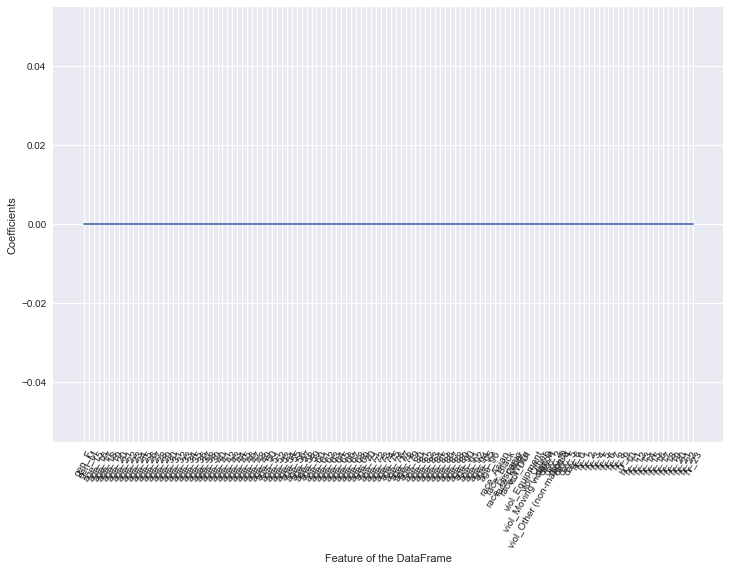

In [16]:
#create plot of Lasso model

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
names = df_new.drop('stop_outcome', axis=1).columns
lasso_coef = lasso.fit(feature, target).coef_

plt.figure(figsize=(12,8))
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
_ = plt.xlabel('Feature of the DataFrame')

plt.show()

- we can see that its entirely Flat. so Lasso model confirms that there is no significantly correlated feature to predict the Traffic stop outcome.


**Evaluate the Liner Regression Model:-**

The liner regression score is :-  0.0414843836904


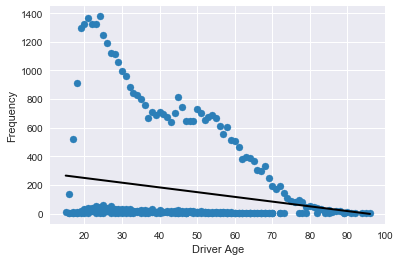

In [20]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# use newdf3 Dataframe from above because we want to use Driver age as that is teh only quantitavie feature.

X = newdf3.drop('id', axis=1).values
y = newdf3['id'].values

X_age = X[:,0]
X_age = X_age.reshape(-1, 1)

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_age), max(X_age)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_age, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('The liner regression score is :- ', reg.score(X_age, y))

# Plot regression line
plt.scatter(X_age, y, color='#2c7fb8')
plt.plot(prediction_space, y_pred, color='black', linewidth=2)
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Driver Age')
plt.show()


- liner regression Score is too low, and as we already saw there is no significant relation with age in the traffic stop or its outcome. so it is possible that there is no significant variable/feature here to choose for correct prediction.



##### Logistic Model matrix and classification

confusion matrix:  [[1463 3605]
 [1210 6760]]
classification report:               precision    recall  f1-score   support

          0       0.55      0.29      0.38      5068
          1       0.65      0.85      0.74      7970

avg / total       0.61      0.63      0.60     13038

roc auc score:  0.653348550058


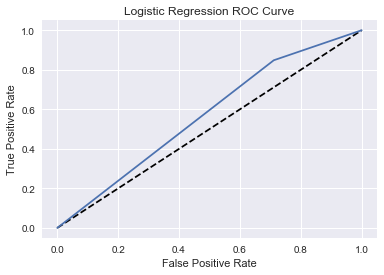

In [101]:
# Compute and print the confusion matrix and classification report
print("confusion matrix: ",confusion_matrix(target_test, target_pred))
print("classification report: ", classification_report(target_test, target_pred))

# Calculate the probablity of correct target prediction of the test set:

target_pred_prob = logreg_cv.predict_proba(feature_test)[:,1]

# Calculate the Are under curve(AUC) for ROC (Receiver Operating Characteristic Curve)
roc_auc_score(target_test, target_pred_prob)
print("roc auc score: ", roc_auc_score(target_test, target_pred_prob))

# lets plot the ROC curve
fpr, tpr, thresholds = roc_curve(target_test, target_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


In [107]:
cv_scores = cross_val_score(logreg_cv, feature, target, cv=5, scoring='roc_auc')
print(cv_scores)
print(np.mean(cv_scores))

[ 0.67686036  0.65343376  0.63740183  0.62782559  0.66165108]
0.651434523191


A popular way of summarizing the discrimination ability of a model is to report the area under the ROC curve. We have seen that a model with discrimination ability has an ROC curve which goes closer to the top left hand corner of the plot, whereas a model with no discrimination ability has an ROC curve close to a 45 degree line. Thus the area under the curve ranges from 1, corresponding to perfect discrimination, to 0.5, corresponding to a model with no discrimination ability. The area under the ROC curve is also sometimes referred to as the c-statistic (c for concordance).

** - Our Logistic regression model have the optimistic AUC of ROC as 65.33% **

** - The Mean of 5 fold cross validation score is also in same range as .6514 **

** - Recall (TP / (TP+FN) ) - Probablity of making right prediction from random example is .63 **

** - Precision ( TP / (TP+FP) ) - probablity of making right prediction from positive examples is .61 **

